In [55]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

import warnings
warnings.filterwarnings('ignore')

In [56]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', ' Dog', 'Frog', 'Horse', 'Ship',
          'Truck']

In [57]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [58]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [59]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

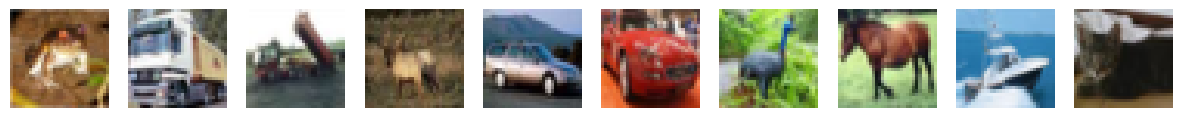

In [60]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i in range(10):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.show()

In [61]:
[labels[i] for i in y_train[:10].flatten()]

['Frog',
 'Truck',
 'Truck',
 'Deer',
 'Automobile',
 'Automobile',
 'Bird',
 'Horse',
 'Ship',
 'Cat']

In [62]:
# 스케일링 진행
scaled_train = x_train / 255
scaled_test = x_test / 255

- 채널 차원이 이미 있으므로 reshape 할 필요가 없음 
- 그대로 CNN에 넣으면 됨 

# 스케일링

In [63]:
scaled_sub, scaled_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size=0.2, stratify= y_train, random_state= 12)

In [64]:
scaled_sub.shape, scaled_val.shape, scaled_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

# 모델 구성 

# MSE 맛집 레시피

In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size= 3, activation = 'relu', padding = 'same',
                              input_shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(32, kernel_size= 3, activation= 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, kernel_size= 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(64, kernel_size= 3, activation= 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128, kernel_size= 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.Conv2D(128, kernel_size= 3, activation= 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation = 'softmax'))

## 1번째 층 
- 기본적으로 컨컨풀드 ( 유명 맛집 레시피 ) 
- 컨컨풀드 : 
- valid 패딩으로 컨브를 하면 쉐이브가 (3, 3) -> (8, 8)로 됨 

- 컨브 2번할때 장점은 파라미터, 
- activation이(활성화함수) 2번 들어감 -> 학습의 효율이 2배로 오름 


- dropout (과대적합 방지) : 자주 0.2씩 넣어줌 


## 2번째 층
- 가면 갈수록 유닛수를 늘림 


In [13]:
opt = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer=opt, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights= True)

In [15]:
history = model.fit(scaled_sub, y_sub, epochs = 30, validation_data = (scaled_val, y_val),
                   callbacks = [early_stopping_cb])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.1399 - loss: 2.2421 - val_accuracy: 0.2944 - val_loss: 1.9570
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2871 - loss: 1.9541 - val_accuracy: 0.3512 - val_loss: 1.8097
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.3625 - loss: 1.7640 - val_accuracy: 0.4308 - val_loss: 1.5631
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.4112 - loss: 1.6201 - val_accuracy: 0.4558 - val_loss: 1.4962
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4480 - loss: 1.5222 - val_accuracy: 0.4978 - val_loss: 1.3763
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.4821 - loss: 1.4300 - val_accuracy: 0.5303 - val_loss: 1.3189
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5047 - loss: 1.3685 - val_accuracy: 0.5516 - val_loss: 1.2555
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5327 -

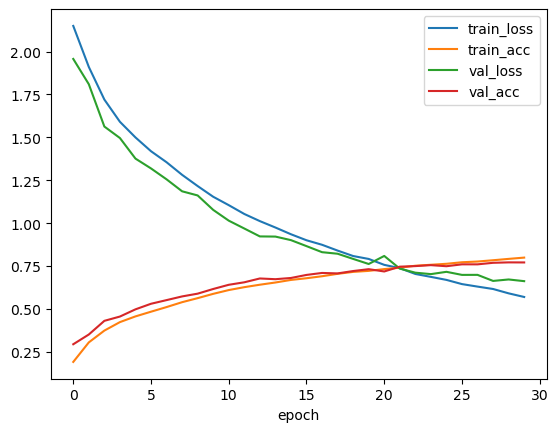

In [16]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

In [17]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7664 - loss: 0.6669


[0.6755409240722656, 0.7656000256538391]

# 강사님 모델

In [65]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64, kernel_size = 4, activation = "relu", padding = "same",
                               input_shape = (32, 32, 3)))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(64, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.2))

model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.25))

model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.35))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(256, activation = "relu"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(10, activation = "softmax"))

- Dropout : 점점 크게 한 이유 -> 과대적합 방지를 위해, 일정하게 처음부터 0.4~0.5로 해도 상관없음 
- BatchNormalization : 배치 정규화 배치 정규화는 평균과 분산을 조정하는 과정이 별도의 과정으로 떼어진 것이 아니라, 신경망 안에 포함되어 학습 시 평균과 분산을 조정하는 과정
- 배치 정규화의 장점
    1. loss 가 일정하게 떨어짐
    2. 과대적합 방지 

- ResNet은 Residual neural network 

In [66]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model1.compile(loss= 'sparse_categorical_crossentropy', optimizer = adam,
               metrics = ['accuracy'])

- 배치정규화 : 학습율을 높여도 꾸준히 성능이 좋게 나옴 
- learning rate 낮추는게 좋음, loss 가 튀는 건 그렇다쳐도 
- 오차를 너무 빠르게 바뀌니까 학습율이 안나옴 
- 오차를 일정하게 낮추는게 좋음, 그러므로 learning rate가 높은게 좋지 않음

In [67]:
model1.fit(scaled_sub, y_sub, epochs = 100, validation_data = (scaled_val, y_val),
           callbacks = [early_stopping_cb], batch_size = 64)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 334ms/step - accuracy: 0.2405 - loss: 2.7281 - val_accuracy: 0.4148 - val_loss: 1.5850
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 216s 345ms/step - accuracy: 0.4038 - loss: 1.8291 - val_accuracy: 0.5122 - val_loss: 1.4009
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 330ms/step - accuracy: 0.4754 - loss: 1.5542 - val_accuracy: 0.5528 - val_loss: 1.2584
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 328ms/step - accuracy: 0.5417 - loss: 1.3359 - val_accuracy: 0.6228 - val_loss: 1.0633


## ResNet50

In [ ]:
base_model = keras.applications.ResNet50(weights = 'imagenet', include_top = False,
                                        input_shape = (32, 32, 3))

In [ ]:
base.model.layers

In [ ]:
# resnet 출력층 구성
resnet = keras.Sequential()
resnet.add(base_model)
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(512, activation = 'relu'))
resnet.add(keras.layers.BatchNormalization())
resnet.add(keras.layers.Dropout(0.5))
resnet.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
resnet.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam,
               metrices = ['accuracy'])

In [ ]:
resnet.fit(scaled_sub, y_sub, epochs = 10, validatino_data = (scaled_val, y_val),
           callbacks = [early_stopping_cb], batch_size = 64)